<a href="https://colab.research.google.com/github/jadeypooh1224/step/blob/main/Ale_client_STEP_project_trend_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries and dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cleaned_data_path = '/content/drive/MyDrive/Data for Social Good/Cleaned_Dataset.xlsx'
cleaned_data_df = pd.read_excel(cleaned_data_path)

print(cleaned_data_df.head())

       id  parent_id  Salvador Amount  Other Grant Amount  \
0  126508     102310              0.0                 0.0   
1  126486      53338              0.0                 0.0   
2  126485     126484              0.0                 0.0   
3  126483     119109              0.0                 0.0   
4  126376      34176              0.0                 0.0   

   Bob Woodruff Foundation Amount  San Manuel BOMI Amount Assist Status  \
0                             0.0                     0.0     Withdrawn   
1                             0.0                     0.0        Active   
2                             0.0                     0.0        Active   
3                             0.0                     0.0        Active   
4                             0.0                     0.0        Active   

  Date Opened                 Date Closed  Days to Close  ...  Goal 2:  \
0  2023-11-06         2023-11-07 00:00:00              1  ...      NaN   
1  2023-11-06  1677-09-20 00:12:43

#Descriptive Statistic Analysis

In [5]:
# Descriptive Statistics Analysis
numerical_overview = cleaned_data_df.describe()
print(numerical_overview)


                  id      parent_id  Salvador Amount  Other Grant Amount  \
count    7964.000000    7964.000000      7964.000000         7964.000000   
mean    52395.103214   49287.485811         1.092338            5.292897   
std     39070.075014   39063.390977        49.552584          115.670064   
min      2822.000000    1705.000000         0.000000            0.000000   
25%     17831.250000   15494.000000         0.000000            0.000000   
50%     41869.500000   37565.000000         0.000000            0.000000   
75%     90605.500000   86886.500000         0.000000            0.000000   
max    126508.000000  126484.000000      2752.040000         3960.680000   

       Bob Woodruff Foundation Amount  San Manuel BOMI Amount  Days to Close  \
count                     7964.000000             7964.000000    7964.000000   
mean                         8.502145                6.278253      13.479282   
std                         94.120938              125.721285      14.42094

In [6]:
# Descriptive Statistics for Overall Effectiveness
overall_effectiveness_stats = cleaned_data_df.describe()

# Segmenting Data for Improvement Areas (example: based on 'Assist Status')
# Replace 'Assist Status' with the actual segmentation criterion column name
segmentation_criterion = 'Assist Status'  # Example
segmented_stats = cleaned_data_df.groupby(segmentation_criterion).describe()


In [7]:
# Category-Based Analysis for 'Assist Status' Column
assist_status_distribution = cleaned_data_df['Assist Status'].value_counts()
assist_status_distribution_percentage = cleaned_data_df['Assist Status'].value_counts(normalize=True) * 100

# Displaying the frequency and percentage distribution
assist_status_analysis = pd.DataFrame({
    "Frequency": assist_status_distribution,
    "Percentage": assist_status_distribution_percentage
})

print(assist_status_analysis)

                               Frequency  Percentage
Referred                            1334   16.750377
Withdrawn                           1266   15.896534
FFP Plus Grant                      1090   13.686590
Approved                            1004   12.606730
Financial Freedom Planning           925   11.614766
Unresponsive                         828   10.396786
FFP Plus Referral                    722    9.065796
FFP Plus Warehouse Visit             347    4.357107
Denied                               250    3.139126
Warehouse Visit Only                  94    1.180311
Active                                54    0.678051
FFP Plus Diapers                      22    0.276243
Pending Application Documents         18    0.226017
ineligible                             2    0.025113
Incomplete Budgeting                   1    0.012557
Recycled Rides                         1    0.012557
Fraud                                  1    0.012557
See Record #25337                      1    0.

# Correlation Analysis

In [8]:
# Correlation Analysis

# Calculating the correlation matrix for numeric columns
correlation_matrix = cleaned_data_df.corr()

# Displaying the correlation matrix
print(correlation_matrix)

                                           id  parent_id  Salvador Amount  \
id                                   1.000000   0.966561         0.024907   
parent_id                            0.966561   1.000000         0.026473   
Salvador Amount                      0.024907   0.026473         1.000000   
Other Grant Amount                   0.050552   0.051325         0.059287   
Bob Woodruff Foundation Amount       0.087540   0.081886         0.072110   
San Manuel BOMI Amount               0.049253   0.043354        -0.001101   
Days to Close                        0.121457   0.117113         0.038211   
Transitional Assistance?            -0.008947  -0.008371        -0.010663   
Baseline Financial Well-being Score  0.691930   0.662128         0.018063   
1c. Financial Well-being Score       0.859436   0.829578         0.006065   
2c. Financial Well-being Score       0.874887   0.845713         0.030071   
3c. Financial Well-being Score       0.879729   0.848565         0.029693   

In [10]:
# 'Total Assistance Amount' represents financial grants
# and 'Baseline Financial Well-being Score' as a success metric

# Grouping data by grant presence (here, we consider any assistance amount as grant presence)
cleaned_data_df['GrantReceived'] = cleaned_data_df['Total Assistance Amount'] > 0 #adds binary column for grant received
grouped_by_grant = cleaned_data_df.groupby('GrantReceived')['Baseline Financial Well-being Score'].mean()

# Displaying the impact
print(grouped_by_grant)


GrantReceived
False    22.466621
True     15.423825
Name: Baseline Financial Well-being Score, dtype: float64


In [23]:
success_metric = 'Baseline Financial Well-being Score'  # Replace with your specific metric
avg_success_with_grant = cleaned_data_df[cleaned_data_df['GrantReceived']][success_metric].mean()
avg_success_without_grant = cleaned_data_df[~cleaned_data_df['GrantReceived']][success_metric].mean()

print(f"Average success with grant: {avg_success_with_grant}")
print(f"Average success without grant: {avg_success_without_grant}")

Average success with grant: 15.423825344091124
Average success without grant: 22.466621137100905


In [11]:
# Correlation Analysis
# 'Number of Services Rendered' represents the frequency of client interactions
correlation = cleaned_data_df[['Number of Services Rendered', 'Baseline Financial Well-being Score']].corr()
print(correlation)

# Optional: Regression Analysis
import statsmodels.api as sm
X = cleaned_data_df['Number of Services Rendered']
y = cleaned_data_df['Baseline Financial Well-being Score']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
print(model.summary())
#Yan comment:
#Conclusion: The R-squared of 0.019 is too low: no correlation between 'Number of Services Rendered' and 'Baseline Financial Well-being Score
#The baseline financial well being score is a self-reported score before the clients receive any help from STEP, so there is not going to
#have any correlation between these two are not causal.. maybe try find the correlation between 'Number of Services Rendered' with 3-month
#wekl-being score or 6-month well being score? So we can say that ahh, the more services provided the higher the score is

                                     Number of Services Rendered  \
Number of Services Rendered                             1.000000   
Baseline Financial Well-being Score                    -0.138799   

                                     Baseline Financial Well-being Score  
Number of Services Rendered                                    -0.138799  
Baseline Financial Well-being Score                             1.000000  
                                     OLS Regression Results                                    
Dep. Variable:     Baseline Financial Well-being Score   R-squared:                       0.019
Model:                                             OLS   Adj. R-squared:                  0.019
Method:                                  Least Squares   F-statistic:                     156.4
Date:                                 Fri, 01 Dec 2023   Prob (F-statistic):           1.49e-35
Time:                                         18:04:36   Log-Likelihood:                -3

# Mean and Average of Total Assistance Amounts (Graphs)

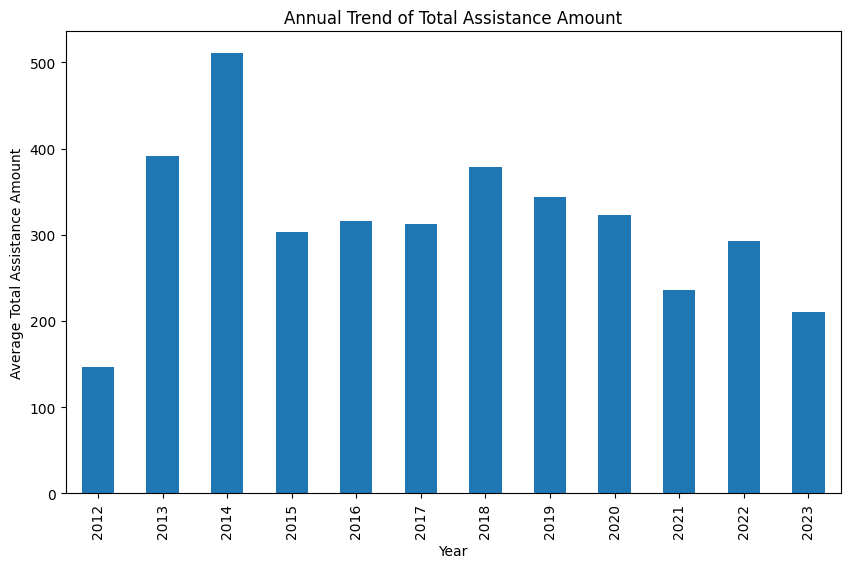

In [12]:
# 'Date Opened' is the date column and 'Total Assistance Amount' is a key metric
cleaned_data_df['Year'] = cleaned_data_df['Date Opened'].dt.year
annual_trends = cleaned_data_df.groupby('Year')['Total Assistance Amount'].mean()

# Plotting
plt.figure(figsize=(10, 6))
annual_trends.plot(kind='bar')
plt.title('Annual Trend of Total Assistance Amount')
plt.xlabel('Year')
plt.ylabel('Average Total Assistance Amount')
plt.show()
#Yan comment: The amount STEP assisted from 2018 to 2023 is going down... why is STEP granting less amount to clients?
#Is it because they have more clients with less financial need or they have less clients to their business? Are they losing clients?

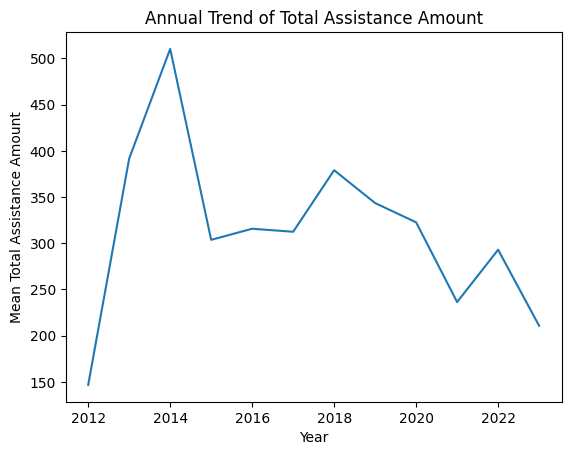

In [13]:
# Converting 'Date Opened' to a datetime object and extracting the year
cleaned_data_df['Year'] = pd.to_datetime(cleaned_data_df['Date Opened']).dt.year

# Grouping by Year and calculating the mean of 'Total Assistance Amount'
annual_trend = cleaned_data_df.groupby('Year')['Total Assistance Amount'].mean()

# Plotting the trend
annual_trend.plot(kind='line', title='Annual Trend of Total Assistance Amount', ylabel='Mean Total Assistance Amount')
plt.show()
#Yan comment: I think you have a bar chart of this already; a line chart is prob better because it is time-series :)


# Analysis of people in a family and assistance

In [14]:
# Analysis based on the number of people in a family
family_size_distribution = cleaned_data_df['# People in Family'].value_counts()
print("Family Size Distribution:\n", family_size_distribution)

# Analysis based on the number of children served
children_served_distribution = cleaned_data_df['#Children Served'].value_counts()
print("\nNumber of Children Served Distribution:\n", children_served_distribution)


Family Size Distribution:
 0     7352
1      197
2      107
3      106
4      101
5       60
6       30
7        7
8        3
80       1
Name: # People in Family, dtype: int64

Number of Children Served Distribution:
 0      7221
1       288
2       247
3       130
4        53
5        13
6         6
7         2
160       2
125       1
60        1
Name: #Children Served, dtype: int64


In [15]:
# Analysis based on assistance status
assist_status_distribution = cleaned_data_df['Assist Status'].value_counts()
print("Assist Status Distribution:\n", assist_status_distribution)

# Analysis based on reasons for grant ineligibility
grant_ineligibility_reasons = cleaned_data_df['Reason for Grant Ineligibility'].value_counts()
print("\nReasons for Grant Ineligibility Distribution:\n", grant_ineligibility_reasons)


Assist Status Distribution:
 Referred                         1334
Withdrawn                        1266
FFP Plus Grant                   1090
Approved                         1004
Financial Freedom Planning        925
Unresponsive                      828
FFP Plus Referral                 722
FFP Plus Warehouse Visit          347
Denied                            250
Warehouse Visit Only               94
Active                             54
FFP Plus Diapers                   22
Pending Application Documents      18
ineligible                          2
Incomplete Budgeting                1
Recycled Rides                      1
Fraud                               1
See Record #25337                   1
Duplicate case                      1
Does not Qualify                    1
SM Reapplied                        1
Warehouse Visit                     1
Name: Assist Status, dtype: int64

Reasons for Grant Ineligibility Distribution:
 Out of SOP:  Service not provided                    

# Financial Well-being Scores

In [16]:
#Data Preparation

# Converting 'Date Closed' column to datetime and filtering out cases older than 2017
cleaned_data_df['Date Closed'] = pd.to_datetime(cleaned_data_df['Date Closed'], errors='coerce')
data_filtered_2017 = cleaned_data_df[cleaned_data_df['Date Closed'].dt.year > 2017]

# Identifying the columns for Financial Well-being Scores
fwbs_columns = [
    '1c. Financial Well-being Score',  # 1-month
    '2c. Financial Well-being Score',  # 2-month
    '3c. Financial Well-being Score',  # 3-month
    '6-Month Financial Well-Being Score',  # 6-month
    '12-Month Financial Well-Being Score'  # 12-month
]

# Converting the FWB columns to numeric, replacing non-numeric values with NaN
data_filtered_2017[fwbs_columns] = data_filtered_2017[fwbs_columns].apply(pd.to_numeric, errors='coerce')

# Filtering out rows with all '9999' or all zeros in FWBS columns
data_filtered_fwbs = data_filtered_2017[
    (~data_filtered_2017[fwbs_columns].eq(9999).all(axis=1)) &  # Not all values are 9999
    (data_filtered_2017[fwbs_columns].ne(0).any(axis=1))  # At least one value is not zero
]

# Displaying the first few rows of the dataset after FWBS filtering
data_filtered_fwbs.head()


,id,parent_id,Salvador Amount,Other Grant Amount,Bob Woodruff Foundation Amount,San Manuel BOMI Amount,Assist Status,Date Opened,Date Closed,Days to Close,...,Goal 3:,Goal 3 Details:,Referral Provided,Reason for Grant Ineligibility,Details: Reason for Grant Ineligibility,Number of Services Rendered,Total Assistance Amount,Story Details,GrantReceived,Year
184,123039,123038,0.0,0.0,0.0,0.0,FFP Plus Referral,2023-09-08,2023-09-28,20,...,NaN,NaN,Employment Resources,Out of SOP: Unsustainable,A plan for FSS is needed and bills are not pas...,0,0.0,"SM reports that when his family PCS'd to WA, t...",False,2023
207,122795,122794,0.0,0.0,0.0,0.0,FFP Plus Grant,2023-09-03,2023-09-22,19,...,Save Toward Specific Goal,"Once the GI BIll starts, he will put $150 a mo...",NaN,NaN,NaN,1,2800.0,SM is an E5 Marine Veteran who discharged in F...,True,2023
227,122291,122290,0.0,0.0,0.0,0.0,FFP Plus Grant,2023-08-24,2023-09-25,32,...,Create Emergency Fund,"Once SM pays off his debt, he will begin to bu...",Military Spouse Employment,NaN,NaN,2,1164.8,SM shared that he received help from NMCRS bef...,True,2023
236,122131,122130,0.0,0.0,0.0,0.0,Financial Freedom Planning,2023-08-20,2023-08-28,8,...,NaN,NaN,NaN,Documentation,SM is unable to obtain required documentation ...,0,0.0,"SM shared that nothing has changed for him, bu...",False,2023
247,122064,12140,0.0,0.0,0.0,0.0,FFP Plus Referral,2023-08-17,2023-08-24,7,...,NaN,SM will look into other area resources to assi...,211|Operation Homefront|USA Cares,Out of SOP: Unsustainable,NaN,1,75.0,SM is an E3 Navy Veteran who discharged in 201...,True,2023


# Trend Analysis

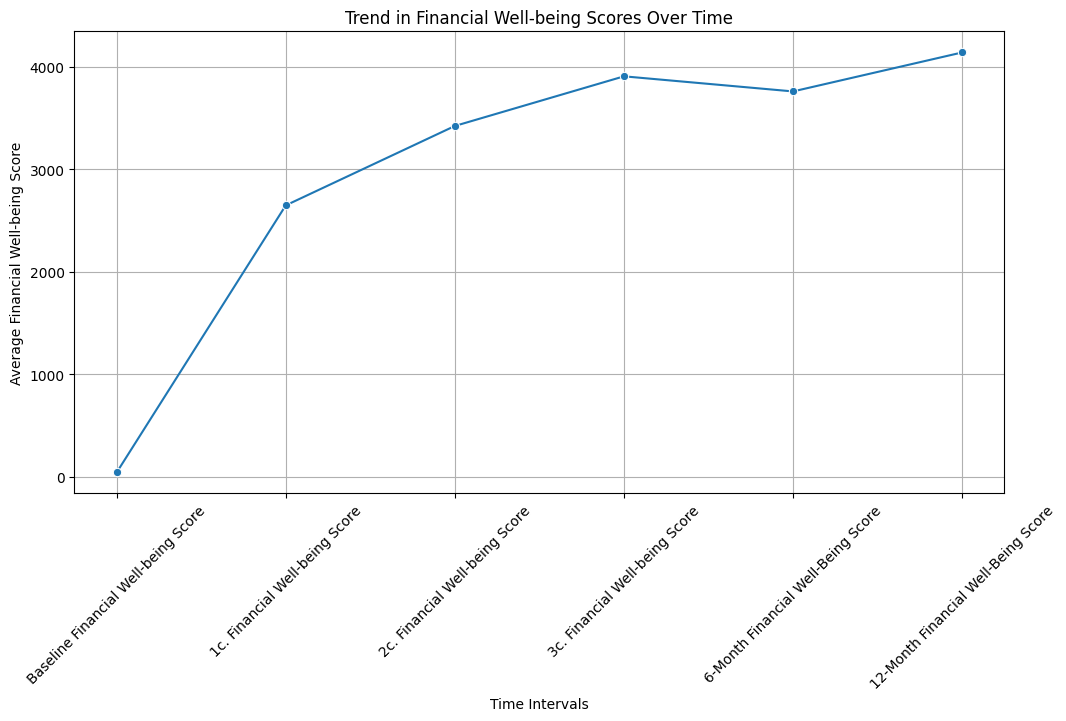

In [17]:

# Identifying the relevant columns for the trend analysis
baseline_column = 'Baseline Financial Well-being Score'
interval_columns = [
    '1c. Financial Well-being Score',  # 1-month
    '2c. Financial Well-being Score',  # 2-month
    '3c. Financial Well-being Score',  # 3-month
    '6-Month Financial Well-Being Score',  # 6-month
    '12-Month Financial Well-Being Score'  # 12-month
]

# Extracting the relevant data
trend_data = data_filtered_fwbs[[baseline_column] + interval_columns]

# Converting all columns to numeric
trend_data = trend_data.apply(pd.to_numeric, errors='coerce')

# Dropping rows with NaN in the baseline column as we need this for comparison
trend_data = trend_data.dropna(subset=[baseline_column])

# Calculating the average score for each time interval
average_scores = trend_data.mean().dropna()

# Plotting the trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_scores, marker='o')
plt.title('Trend in Financial Well-being Scores Over Time')
plt.xlabel('Time Intervals')
plt.ylabel('Average Financial Well-being Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# this graph illustrates how the average Financial Well-Being Scores change over different time
# Intervals (baseline, 1-month, 2-month, 3-month, 6-month, 12-month)
# It shows the progession of Finacial WBS from the baseline to each interval


# Assessing Step Program Effectiveness

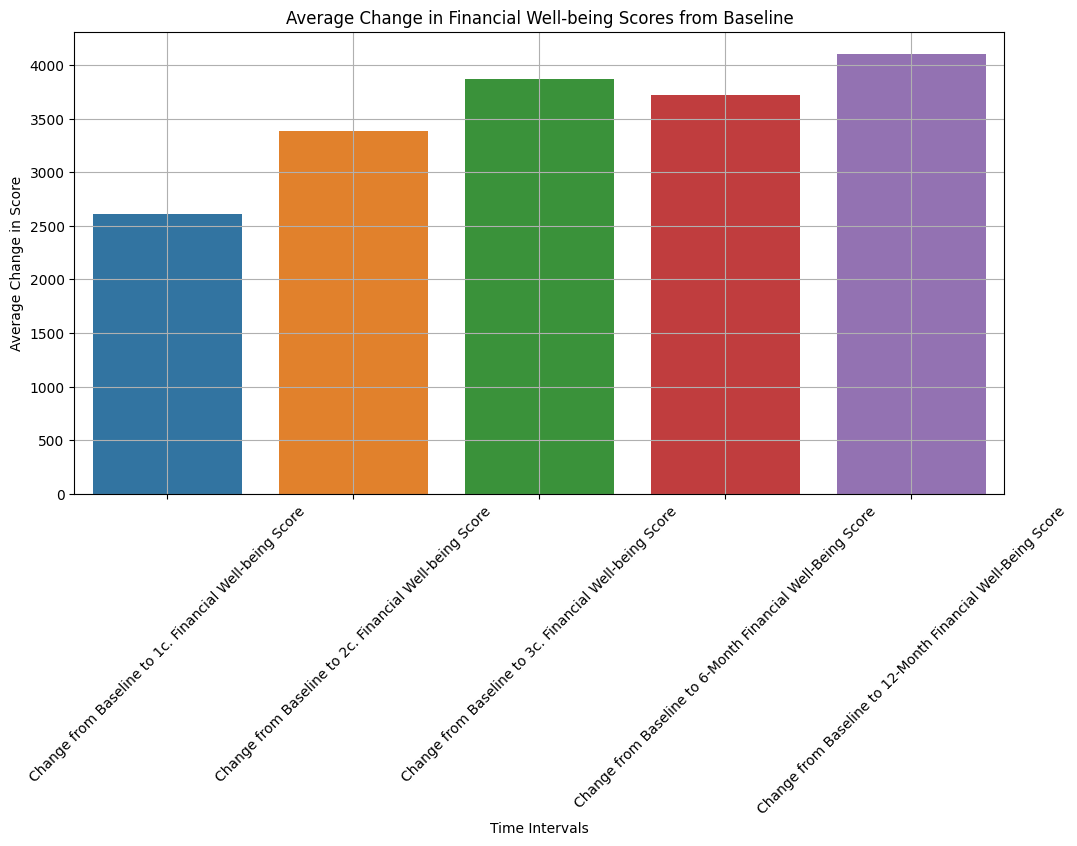

Change from Baseline to 1c. Financial Well-being Score         2609.501087
Change from Baseline to 2c. Financial Well-being Score         3385.276087
Change from Baseline to 3c. Financial Well-being Score         3870.231522
Change from Baseline to 6-Month Financial Well-Being Score     3722.693478
Change from Baseline to 12-Month Financial Well-Being Score    4103.453261
dtype: float64

In [18]:

# Adding new columns for each interval representing the change from the baseline
for interval in fwbs_columns:
    change_column = f'Change from Baseline to {interval}'
    trend_data[change_column] = trend_data[interval] - trend_data[baseline_column]

# Calculating the average change for each time interval
average_changes = trend_data[[f'Change from Baseline to {interval}' for interval in fwbs_columns]].mean()

# Plotting the average change
plt.figure(figsize=(12, 6))
sns.barplot(x=average_changes.index, y=average_changes.values)
plt.title('Average Change in Financial Well-being Scores from Baseline')
plt.xlabel('Time Intervals')
plt.ylabel('Average Change in Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

average_changes


# it suggest that the STEP program is effective in improving the FWB of clients
# specially noticeable in the long-term.

Impact of Financial Grants

In [19]:
# Categorizing clients based on whether they received any financial grant
grant_columns = ['Salvador Amount', 'Other Grant Amount', 'Bob Woodruff Foundation Amount', 'San Manuel BOMI Amount']
data_filtered_fwbs['Received Grant'] = data_filtered_fwbs[grant_columns].sum(axis=1) > 0

# Grouping the data by grant reception status and calculating average Financial Well-being Scores
average_scores_by_grant = data_filtered_fwbs.groupby('Received Grant')[fwbs_columns].mean()

# Displaying the average scores by grant reception status
average_scores_by_grant

# the analysis compares the average FWBS at different intervals between
# clients who received financial grants and those who did not
# those who did have a significantly higher average at all intervals compared to those who did not.

,1c. Financial Well-being Score,2c. Financial Well-being Score,3c. Financial Well-being Score,6-Month Financial Well-Being Score,12-Month Financial Well-Being Score
Received Grant,,,,,
False,2583.236220,3274.187852,3708.893138,3645.686164,4006.244094
True,4543.419355,7751.709677,9677.709677,7111.774194,8071.870968


In [20]:
# Client Interaction Frequency and Financial Well-being

# Exploring the relationship between the number of services rendered and Financial Well-being Scores
interaction_column = 'Number of Services Rendered'

# Calculating the correlation between the number of services rendered and FWB scores
correlations = data_filtered_fwbs[fwbs_columns + [interaction_column]].corr()[interaction_column].iloc[:-1]

# Displaying the correlations
correlations

#the negative values indicate a weak inverse relationship between the number of services
# provided and the FWBS. it suggests that higher interaction frequencies might be with
# slightly lower FWBS.

1c. Financial Well-being Score        -0.084459
2c. Financial Well-being Score        -0.107402
3c. Financial Well-being Score        -0.088753
6-Month Financial Well-Being Score    -0.064556
12-Month Financial Well-Being Score   -0.055978
Name: Number of Services Rendered, dtype: float64